### Numpy 치트시트
https://github.com/Pseudo-Lab/cheat-sheet

가짜연구소 치트시트는 함께 만드는 치트시트를 지향합니다. 

참여를 희망하신다면 [깃허브 저장소](https://github.com/Pseudo-Lab/cheat-sheet)에 코드를 PR하시거나 깃허브 이슈에 의견을 남겨주시기 바랍니다.

또한 반드시 코드가 아니더라도 Issue 게시판에 피드백을 남겨주시는 방식으로도 프로젝트에 기여하실 수 있습니다.



- [가짜연구소 소개](https://pseudo-lab.com/)
- [치트시트 깃허브 저장소](https://github.com/Pseudo-Lab/cheat-sheet)
- [가짜연구소 디스코드](https://discord.gg/EPurkHVtp2)
- [`matplotlib` 치트시트](?src=matplotlib)

In [93]:
# https://pseudo-lab.com/

### 한장으로 보는 넘파이


예시에서 사용될 `x`, `y`, `X`, `Y`는 위와 같습니다.

하단의 `예시 코드 보기`를 누르시면, 시각화에 사용된 함수에 대한 구체적인 명세를 확인하실 수 있습니다.

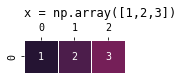

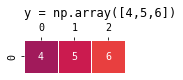

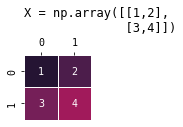

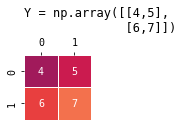

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="monospace")

x = np.array([1,2,3])
y = np.array([4,5,6])


X = np.array([[1,2],
              [3,4]])
Y = np.array([[4,5],
              [6,7]])

def visualize(X, title, 
    item_size=0.6, fmt="d"):
    
    if len(X.shape) == 1 :
        X = np.expand_dims(
            X, axis=0) 

    ncols, nrows = X.shape
    fig, ax = plt.subplots(
        figsize=(
            nrows*item_size, 
            ncols*item_size)
    )
    ax.xaxis.tick_top()

    ax.set_title(f"{title}", loc="left")
    sns.heatmap(
        X, 
        linecolor="white",
        linewidths=1.,
        annot=True, 
        vmin=0, vmax=10,
        fmt=fmt, 
        cbar=None, 
        ax=ax,)
    plt.show()

visualize(x, 
    "x = np.array([1,2,3])")
visualize(y, 
    "y = np.array([4,5,6])")

visualize(X, 
    """X = np.array([[1,2],
              [3,4]])""")
visualize(Y, 
    """Y = np.array([[4,5],
              [6,7]])""")

#### 1차원 배열 연결하기




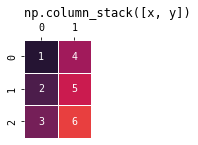

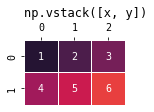

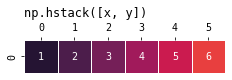

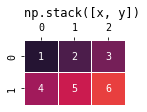

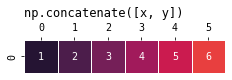

In [68]:
visualize(
    np.column_stack([x, y]), 
    "np.column_stack([x, y])")
# array([[1, 4],
#        [2, 5],    
#        [3, 6]])    

visualize(
    np.vstack([x, y]), 
    "np.vstack([x, y])")
# array([[1, 2, 3],
#        [4, 5, 6]])

visualize(
    np.hstack([x, y]), 
    "np.hstack([x, y])")
# array([1, 2, 3, 4, 5, 6])

visualize(
    np.stack([x, y]), 
    "np.stack([x, y])")
# array([[1, 2, 3],
#        [4, 5, 6]])

visualize(
    np.concatenate([x, y]), 
    "np.concatenate([x, y])")
# array([1, 2, 3, 4, 5, 6])

# 1차원 배열 분리하기



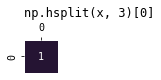

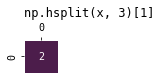

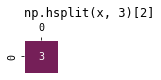

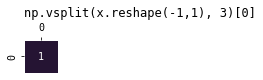

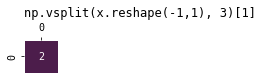

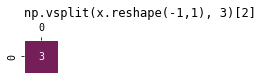

In [69]:
for i, _x in enumerate(np.hsplit(x, 3)):
    visualize(
        _x, 
        f"np.hsplit(x, 3)[{i}]")
# [array([1]), array([2]), array([3])]

for i, _x in enumerate(np.vsplit(
    x.reshape(-1,1), 3)):
    visualize(
        _x, 
        f"np.vsplit(x.reshape(-1,1), 3)[{i}]")
# [array([1]), array([2]), array([3])]

#### 2차원 배열 연결하기(1)




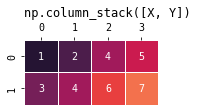

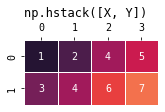

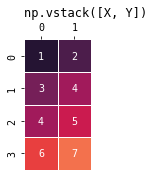

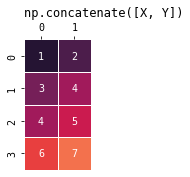

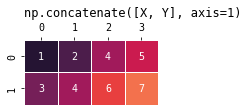

In [70]:
# >>> np.column_stack([X, Y])
visualize(
    np.column_stack([X, Y]), 
    "np.column_stack([X, Y])")
# array([[1, 2, 5, 6],
#        [3, 4, 7, 8]])

# >>> np.hstack([X, Y])
visualize(
    np.hstack([X, Y]), 
    "np.hstack([X, Y])")
# # array([[1, 2, 5, 6],
# #        [3, 4, 7, 8]])

# >>> np.vstack([X, Y])
visualize(
    np.vstack([X, Y]), 
    "np.vstack([X, Y])")
# # array([[1, 2],
# #        [3, 4],
# #        [5, 6],
# #        [7, 8]])



# >>> np.concatenate([X, Y])
visualize(
    np.concatenate([X, Y]), 
    "np.concatenate([X, Y])")
# # array([[1, 2],
# #        [3, 4],
# #        [5, 6],
# #        [7, 8]])

# >>> np.concatenate([X, Y], axis=1)
visualize(
    np.concatenate([X, Y], axis=1), 
    "np.concatenate([X, Y], axis=1)")
# # array([[1, 2, 5, 6],
# #        [3, 4, 7, 8]])

### 2차원 배열 연결하기(2)


```python
>>> np.stack([X,Y])
# array([[[1, 2],
#         [3, 4]],
#        [[5, 6],
#         [7, 8]]])

>>> np.stack([X,Y], axis=1)
# array([[[1, 2],
#        [4, 5]],
#       [[3, 4],
#        [6, 7]]])

>>> np.stack([X,Y], axis=2);
# array([[[1, 4],
#        [2, 5]],
#       [[3, 6],
#        [4, 7]]])
```

`np.stack([X,Y])`과 `np.hstack([X,Y], axis=1)`의 결과는 3차원 배열입니다. 시각화하기 다소 어려운 면이 있어 코드의 출력을 보여주는 형태로 대신하겠습니다. 😢

In [90]:
np.stack([X,Y])
# array([[[1, 2],
#         [3, 4]],
#        [[5, 6],
#         [7, 8]]])

np.stack([X,Y], axis=1)
# array([[[1, 2],
#        [4, 5]],
#       [[3, 4],
#        [6, 7]]])

np.stack([X,Y], axis=2);
# array([[[1, 4],
#        [2, 5]],
#       [[3, 6],
#        [4, 7]]])

#### 2차원 배열 분리하기



`np.hsplit`은 수평을 기준으로, `np.vsplit`은 수직을 기준으로 배열을 분리합니다. 분리된 배열은 `list`에 담긴 형태로 반환됩니다.

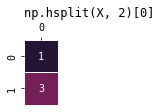

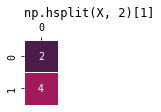

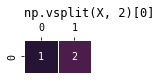

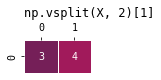

In [ ]:
for i, x in enumerate(np.hsplit(X, 2)):
    visualize(x, f"np.hsplit(X, 2)[{i}]")
# [array([[1],
#        [3]]),
#  array([[2],
#         [4]])]

for i, x in enumerate(np.vsplit(X, 2)):
    visualize(x, f"np.vsplit(X, 2)[{i}]")
# [array([[1, 2]]),
# # array([[3, 4]])]


#### 기타



`X.view()`는 배열 `X`의 `view`를 반환합니다. 

`np.copy(X)`는 배열 `X`의 복사본을 반환합니다. 

`X.copy()`는 배열 `X`의 깊은 복사본을 반환합니다.

`X.sort(axis=0)`은 배열 `X`를 `axis`인자를 기준으로 정렬합니다. 

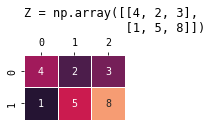

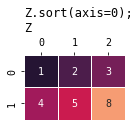

In [ ]:

Z = np.array([[4, 2, 3],
              [1, 5, 8]])
visualize(Z, 
"""Z = np.array([[4, 2, 3],
              [1, 5, 8]])""")
                  
Z.sort(axis=0)
visualize(Z, 
        "Z.sort(axis=0);\nZ")


#### 난수 샘플링



`np.random.randint`는 인자로 전달한 범위내에서 정수를 임의로 추출합니다.

`np.random.uniform`은 균등분포에서 샘플을 추출합니다.

`np.random.normal`은 정규분포에서 샘플을 추출합니다.


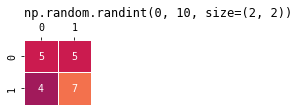

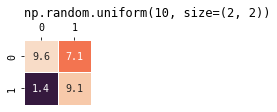

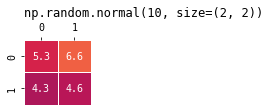

In [ ]:
visualize(
    np.random.randint(
        0, 10,
        size=(2, 2)),
    "np.random.randint(0, 10, size=(2, 2))")

visualize(
    np.random.uniform(
        0, 10,
        size=(2, 2)),
    "np.random.uniform(10, size=(2, 2))",
    fmt=".1f")

visualize(
    np.random.normal(
        loc=5, scale=1,
        size=(2, 2)),
    "np.random.normal(10, size=(2, 2))",
    fmt=".1f")

#### 배열 모양바꾸기 (1)



```python
>>> np.expand_dims(X, 0)
# array([[[1, 2],
#         [3, 4]]])

>>> np.expand_dims(X, 1)
# array([[[1, 2]],
#        [[3, 4]]])

>>> np.expand_dims(X, 2)
# array([[[1], [2]],
#        [[3], [4]]])
```

`np.expand_dims`는 한 차원 더 높은 배열로 변환시킵니다.

`np.squeeze`는 한 차원 더 낮은 배열로 변환시킵니다.

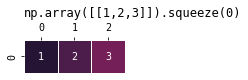

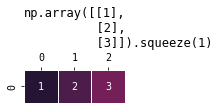

In [ ]:
visualize(
    np.array([[1,2,3]]).squeeze(0),
    "np.array([[1,2,3]]).squeeze(0)"
)

visualize(
    np.array([[1],[2],[3]]).squeeze(1),
    """np.array([[1],
          [2],
          [3]]).squeeze(1)""")

#### 배열 모양바꾸기 (2)


`reshape`를 통해 배열의 모양을 자유롭게 바꿀 수 있습니다.

단, 차원의 크기를 결정하는 인자에 `-1` 을 넣으면 해당 차원의 크기를 자동으로 조절하겠다는 이야기가 됩니다.

만약 reshape(-1,1)을 호출한다면, 행은 알아서 하고, 열의 사이즈만
1로 맞추어 달라고 요구하는 것과 같습니다!

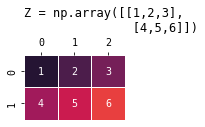

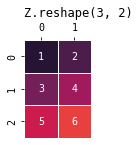

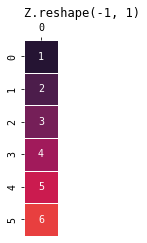

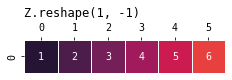

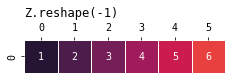

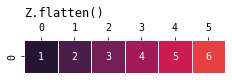

In [92]:
Z = np.array([[1,2,3],
               [4,5,6]])

visualize(Z, """Z = np.array([[1,2,3],
               [4,5,6]])""")

# >>> X.reshape(3, 2)
visualize(Z.reshape(3, 2),
    "Z.reshape(3, 2)")
# array([[1, 2],
#        [3, 4],
#        [5, 6]])

"""
-1 을 넣으면 해당 차원의 크기는 
자동으로 조정됩니다.
만약 reshape(-1,1)을 호출한다면, 
행은 알아서 하고, 열의 사이즈만
1로 맞추어 달라고 요구하는 것과
같습니다!
"""
# >>> X.reshape(-1, 1)
visualize(Z.reshape(-1, 1),
    "Z.reshape(-1, 1)")
# array([[1],
#        [2],
#        [3],
#        [4],
#        [5],
#        [6]])

# >>> X.reshape(1, -1)
visualize(Z.reshape(1, -1),
    "Z.reshape(1, -1)")
# array([[1, 2, 3, 4, 5, 6]])

# X.reshape(-1)
visualize(Z.reshape(-1),
    "Z.reshape(-1)")
# array([1, 2, 3, 4, 5, 6])

# >>> X.flatten()
visualize(Z.flatten(),
    "Z.flatten()")
# array([1, 2, 3, 4, 5, 6])

#### 배열 생성




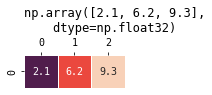

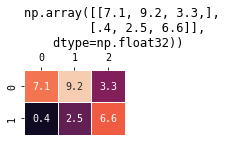

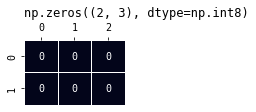

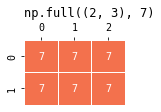

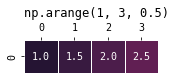

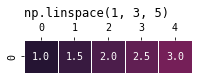

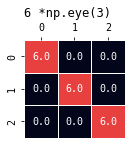

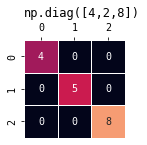

In [ ]:
# #### 배열 생성

# >>> np.array([.1, .2, .3],
#              dtype=np.float32)
visualize(np.array([2.1, 6.2, 9.3],
    dtype=np.float32),
    """np.array([2.1, 6.2, 9.3],
    dtype=np.float32)""", fmt=".1f")

# # array([0.1, 0.2, 0.3], 
# #       dtype=float32)


# >>> np.array([[.1, .2, .3,],
#               [.4, .5, .6]],
#               dtype=np.float32)
visualize(np.array([[7.1, 9.2, 3.3,],
    [.4, 2.5, 6.6]],
    dtype=np.float32), 
    """np.array([[7.1, 9.2, 3.3,],
         [.4, 2.5, 6.6]],
    dtype=np.float32))""", fmt=".1f" )
# # array([[0.1, 0.2, 0.3],
# #        [0.4, 0.5, 0.6]], 
# #        dtype=float32)


# >>> np.zeros((2, 3), dtype=np.int8)
visualize(np.zeros((2, 3), dtype=np.int8),
    "np.zeros((2, 3), dtype=np.int8)" )
# # array([[0, 0, 0],
# #        [0, 0, 0]], dtype=int8)


# >>> np.full((2, 3), 7)
visualize(np.full((2, 3), 7),
    "np.full((2, 3), 7)" )
# # array([[10, 10, 10],
# #        [10, 10, 10]])

# >>> np.arange(1, 3, 0.5)
visualize(
    np.arange(1, 3, 0.5),
    "np.arange(1, 3, 0.5)",
    fmt=".1f"
)
# # array([1. , 1.5, 2. , 2.5])

# >>> np.linspace(1, 3, 5)
visualize(
    np.linspace(1, 3, 5),
    "np.linspace(1, 3, 5)",
    fmt=".1f"
)
# # array([1. , 1.5, 2. , 2.5, 3. ])

# >>> 6 * np.eye(3)
visualize(
    6 * np.eye(3), 
    "6 *np.eye(3)", 
    fmt=".1f"
)
# # array([[6., 0., 0.],
# #        [0., 6., 0.],
# #        [0., 0., 6.]])

# >>> np.diag([4,2,8])
visualize(np.diag([4,5,8]), "np.diag([4,2,8])")
# # array([[4, 0, 0],
# #        [0, 5, 0],
# #        [0, 0, 8]])
# ```

#### 연산




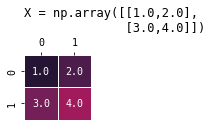

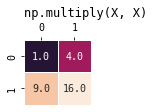

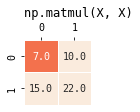

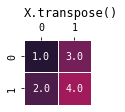

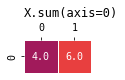

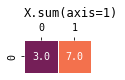

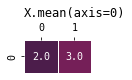

In [ ]:
X = np.array([[1.0,2.0],
              [3.0,4.0]], dtype=np.float32)
visualize(X, """X = np.array([[1.0,2.0],
              [3.0,4.0]])""", fmt=".1f")

# >>> np.multiply(X, X)
visualize(
    np.multiply(X, X), 
    "np.multiply(X, X)", 
    fmt=".1f")
# # array([[ 1.,  4.],
# #        [ 9., 16.]])

# >>> np.matmul(X, X)
visualize(
    np.matmul(X, X),
    "np.matmul(X, X)",
    fmt=".1f"
)
# # array([[ 7., 10.],
# #        [15., 22.]])

# >>> X.transpose()
visualize(
    X.transpose(),
    "X.transpose()",
    fmt=".1f"
)
# # array([[1., 3.],
# #        [2., 4.]])

# >>> X.sum(axis=0)
visualize(
    X.sum(axis=0),
    "X.sum(axis=0)",
    fmt=".1f"
)
# # array([4., 6.])

# >>> X.sum(axis=1)
visualize(
    X.sum(axis=1),
    "X.sum(axis=1)",
    fmt=".1f"
)
# # array([3., 7.])

# >>> X.mean(axis=0)
visualize(
    X.mean(axis=0),
    "X.mean(axis=0)",
    fmt=".1f"
)
# # array([2., 3.])



#### 인덱싱


```python
>>> X = np.array([[1,2,3],
                  [4,5,6]])

>>> X[1,0] 
# 4

>>> X[1,0:2]
# array([4, 5])


"""
아래의 결과는 Fancy Indexing으로
X[1,0], X[0,1], X[1,2], X[1,1]을 
차례대로 나열한 것입니다.
"""
>>> X[[1,0,1,1], 
      [0,1,2,1]]
# array([4, 2, 6, 5])

>>> X < 3
# array([[ True,  True, False],
#        [False, False, False]])

>>> X[X<3]
# array([1, 2])
```

In [ ]:
# 

#### 배열의 저장 및 불러오기


```python
>>> X = np.array([[1,2,3],
                  [4,5,6]])

>>> np.save("X.npy", X)

>>> np.savez("X.npz", 
              col1=X[:,0], 
              col2=X[:,1])

>>> np.load("X.npy")
# array([[1, 2, 3],
#        [4, 5, 6]])

>>> arrs = np.load("X.npz")

>>> arrs["col1"] 
# array([1, 4])

>>> arrs["col2"]
# array([2, 5])

>>> np.savetxt("X.csv", 
                X, 
                delimiter=",")

>>> np.loadtxt("X.csv", 
                delimiter=",")
# array([[1., 2., 3.],
#        [4., 5., 6.]])
```



In [ ]:
# 